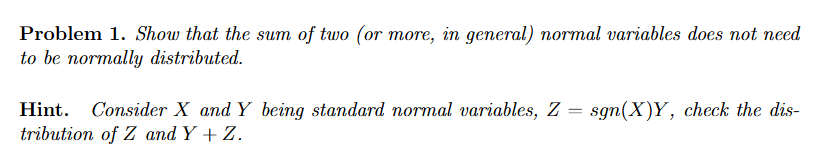

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, kstest, levy_stable, cauchy
import statsmodels.api as sm

In [2]:
X = np.random.normal(0, 1, 10000)
Y = np.random.normal(0, 1, 10000)

In [3]:
Z = np.sign(X)*Y

(array([0.00213625, 0.0008545 , 0.00299075, 0.00726324, 0.01068123,
        0.0337527 , 0.05255167, 0.0675054 , 0.11535733, 0.15850952,
        0.21618818, 0.26147662, 0.3080468 , 0.35290798, 0.39520567,
        0.39905092, 0.36743446, 0.36957071, 0.30291981, 0.24908639,
        0.18756248, 0.14697379, 0.10595785, 0.06451466, 0.04443394,
        0.02392597, 0.01538098, 0.00640874, 0.0025635 , 0.00128175]),
 array([-3.60264449, -3.36858914, -3.1345338 , -2.90047846, -2.66642311,
        -2.43236777, -2.19831242, -1.96425708, -1.73020173, -1.49614639,
        -1.26209104, -1.0280357 , -0.79398035, -0.55992501, -0.32586966,
        -0.09181432,  0.14224103,  0.37629637,  0.61035172,  0.84440706,
         1.07846241,  1.31251775,  1.5465731 ,  1.78062844,  2.01468379,
         2.24873913,  2.48279448,  2.71684982,  2.95090516,  3.18496051,
         3.41901585]),
 <BarContainer object of 30 artists>)

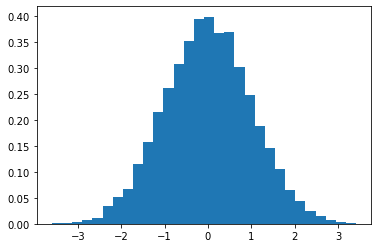

In [7]:
plt.hist(Z, bins=30, density=True)

In [9]:
Ź = Y + Z

(array([6.44978710e-04, 0.00000000e+00, 1.07496452e-03, 2.36492194e-03,
        3.65487936e-03, 9.88967356e-03, 1.52644961e-02, 1.82743968e-02,
        2.94540278e-02, 3.82687368e-02, 5.56831620e-02, 7.46025375e-02,
        7.84724097e-02, 9.15869769e-02, 9.61018278e-02, 1.16268162e+00,
        8.98670336e-02, 8.94370478e-02, 7.91173885e-02, 6.12729775e-02,
        4.96633607e-02, 3.74087652e-02, 2.79490774e-02, 1.31145671e-02,
        1.22545955e-02, 6.23479420e-03, 3.00990065e-03, 1.28995742e-03,
        1.07496452e-03, 2.14992903e-04]),
 array([-7.11591725, -6.65078561, -6.18565398, -5.72052235, -5.25539072,
        -4.79025909, -4.32512745, -3.85999582, -3.39486419, -2.92973256,
        -2.46460093, -1.9994693 , -1.53433766, -1.06920603, -0.6040744 ,
        -0.13894277,  0.32618886,  0.7913205 ,  1.25645213,  1.72158376,
         2.18671539,  2.65184702,  3.11697865,  3.58211029,  4.04724192,
         4.51237355,  4.97750518,  5.44263681,  5.90776845,  6.37290008,
         6.83803

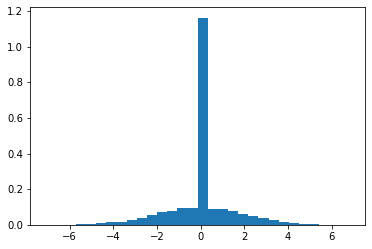

In [10]:
plt.hist(Ź, bins=30, density=True)

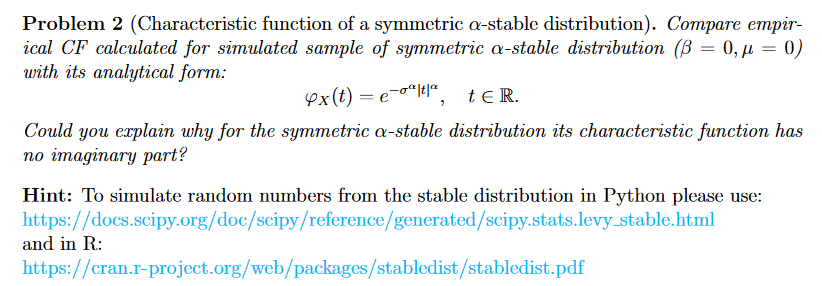

lecture: $S_{\alpha} (\sigma, \beta, \mu)$

pythą: $S(\alpha, \beta, \mu, c=\sigma)$

Nolan: $S(\alpha, \gamma=\sigma, \beta, \delta=\mu)$

In [4]:
alpha = 1.5
sigm = 5
beta = 1
mu = 10
n = 10000

In [15]:
X = levy_stable.rvs(alpha, beta, loc=mu, scale=sigm, size=n)

{'whiskers': [<matplotlib.lines.Line2D at 0x2af1f4975b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2af1f497c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af1f4972b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2af1f4a5130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af1f4a5400>],
 'means': []}

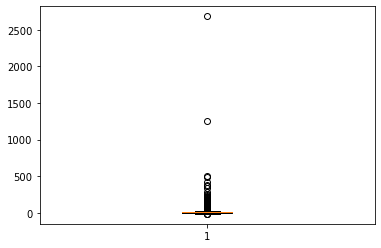

In [16]:
plt.boxplot(X)

In [17]:
np.mean(X)

9.686946879755931

In [19]:
alpha = 1.5
sigm = 2
beta = 0
mu = 0
n = 10000

In [20]:
X = levy_stable.rvs(alpha, beta, loc=mu, scale=sigm, size=n)

In [38]:
xs = np.linspace(-3, 3, 10000)

In [39]:
def cf(t):
    return np.exp(-sigm**alpha * np.abs(t)**alpha)

In [40]:
def ecf(t):
    return (1/n) * sum([np.exp(t*1j*X[i]) for i in range(n)])

In [41]:
ys1 = cf(xs)

In [42]:
ys2 = ecf(xs)

In [43]:
ys2_real = np.real(ys2)

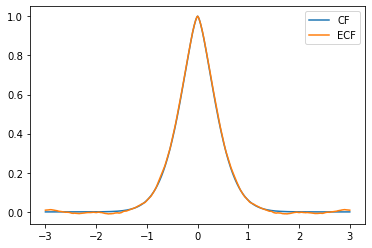

In [44]:
plt.plot(xs, ys1, label="CF")
plt.plot(xs, ys2_real, label="ECF")
plt.legend()

### Estimation methods for parameters of $\alpha$-stable distribution

#### - Quantile method (not very accurate, fast)

#### - Characteristic function method (quite accurate and fast)

#### - Max Likelihood Estimation, MLE (accurate, quite slow)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html -> quantile for initiation, then MLE

Generate sample of length 1000 with $\alpha=1.8$, $\sigma=2$, $\beta=-0.3$, $\mu=5$, estimate parameters, repeat 10000 times and put results on boxplot.

In [11]:
alphas = np.zeros(1000)
betas = np.zeros(1000)
sigmas = np.zeros(1000)
mus = np.zeros(1000)

In [12]:
alpha = 1.8
beta = -0.3
sigma = 2
mu = 5

In [13]:
for i in range(1000):
    X = levy_stable.rvs(alpha, beta, loc=mu, scale=sigma, size=1000)
    fit = levy_stable._fitstart(X)
    alphas[i] = fit[0]
    betas[i] = fit[1]
    mus[i] = fit[2]
    sigmas[i] = fit[3]

In [15]:
np.mean(alphas)

1.8149216748274182

In [16]:
np.mean(betas)

-0.3632848951489866

In [17]:
np.mean(mus)

5.1872028341561744

In [18]:
np.mean(sigmas)

1.9958913030202312

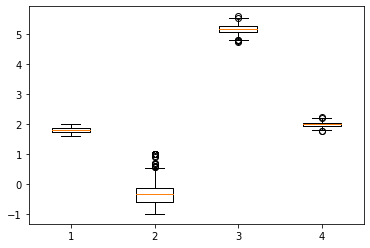

In [20]:
plt.boxplot([alphas, betas, mus, sigmas])
plt.show()

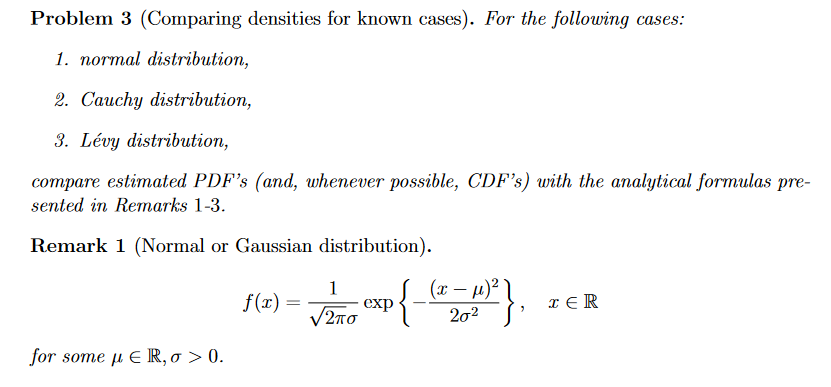
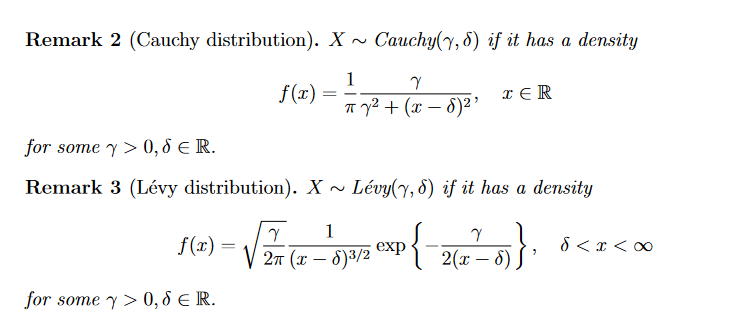

#### Cauchy

In [84]:
n = 10000
gamma = 2
delta = 4
alpha = 1
beta = 0

X = levy_stable.rvs(alpha, beta, loc=delta, scale=gamma, size=n)

In [85]:
kde = sm.nonparametric.KDEUnivariate(X)
kde.fit()

In [86]:
def dens(x):
    return (1/(np.pi)) * (gamma/(gamma**2 + (x-delta)**2))

In [87]:
xs = np.linspace(-50, 50, num=len(kde.support))

In [88]:
pdf = dens(xs)
print(pdf)

[0.00021802 0.00021807 0.00021812 ... 0.00030045 0.00030037 0.00030029]


(-50.0, 50.0)

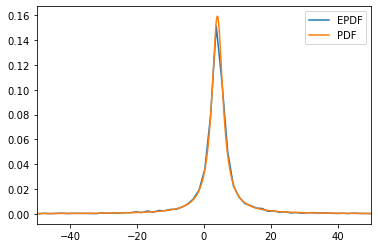

In [89]:
plt.plot(kde.support, kde.density, label="EPDF")
plt.plot(xs, pdf, label="PDF")
plt.legend()
plt.xlim([-50, 50])

# Reports:

max 10 pages

Law of Large Numbers - check visually existence of the moments for simulated samples of different distributions

Central Limit Theorem - speed of convergence for different distributions, simulation of random normal variables and comparison with Box Muller method or maybe additionaly different methods (compare accuracy and speed)

checking accuracy and speed of different estimation methods for alpha stable rvs (if you find more than one, if not check different sets of parameters)

find real world dataset  (financial will be ok, stock exchange for example), try to fit alpha stable distribution, check the goodness of fit (visually)

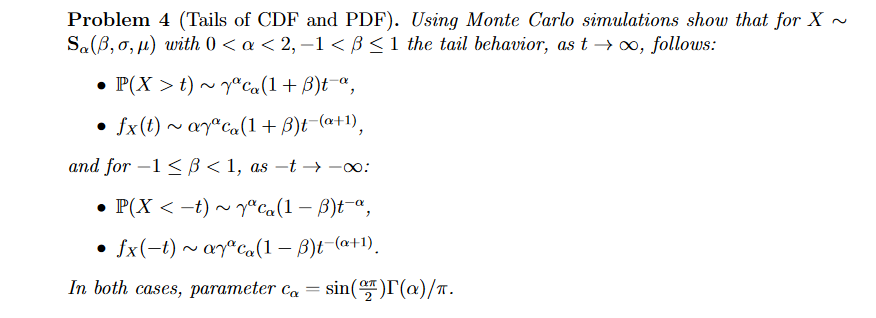

To determine if data has an exponential decay, we can rescale Y axis to log(Y). It should look linear in the tail!

$1 - F(x) \sim e^{-t} \rightarrow log(y) \sim -x$

To determine if data has a power-log decay, we can rescale bot X and Y axis, this time also with logarithm but not natural.

$1 - F(x) \sim t^{\alpha} \rightarrow y \sim -\alpha \cdot x$

In [2]:
n = 10000
alpha = 1.6
sigma = 1
beta = 0.5
mu = 0

In [9]:
X = levy_stable.rvs(alpha, beta, loc=mu, scale=sigma, size=n)

In [10]:
t = sorted(X)

In [11]:
ecdf = ECDF(X)
vals = ecdf(t)

In [13]:
logX = np.log(1 - vals)
logt = np.log(t)

C:\Users\lab\AppData\Local\Temp\ipykernel_7720\1183583968.py:1: RuntimeWarning: divide by zero encountered in log
  logX = np.log(1 - vals)
C:\Users\lab\AppData\Local\Temp\ipykernel_7720\1183583968.py:2: RuntimeWarning: invalid value encountered in log
  logt = np.log(t)


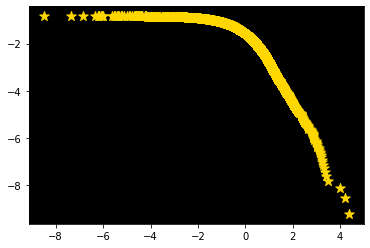

In [31]:
ax = plt.axes()
plt.scatter(logt, logX, s=100, marker="*", c="gold")
ax.set_facecolor("black")

In [67]:
newt = logt[-110:-10]
newX = logX[-110:-10]

In [68]:
a, b = np.polyfit(newt, newX, 1)

In [69]:
a

-1.726498750440753

In [70]:
b

-1.0380400059318613

(-10.0, 1.0)

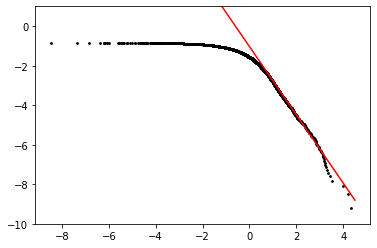

In [71]:
plt.scatter(logt, logX, c="black", s=3)
plt.plot(logt, a*logt+b, c="red")
plt.ylim([-10,1])

This estimation is not very accurate - alpha varies depending on range of observations we will consider for regression.